In [68]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray
from abc import ABC, abstractmethod


In [69]:
class Scaler(ABC):
    @abstractmethod
    def normalize(self, X: NDArray, update_params: bool = False) -> NDArray:
        pass

    @abstractmethod
    def denormalize(self, X: NDArray) -> NDArray:
        pass

class MinMaxScaler(Scaler):
    def __init__(self):
        self.min = None
        self.max = None
        pass

    def normalize(self, X: NDArray, update_params: bool = False):
        min = np.min(X, axis=0) if self.min is None or update_params else self.min
        max = np.max(X, axis=0) if self.max is None or update_params else self.max

        self.min = min
        self.max = max

        return (X - min) / (max - min)

    def denormalize(self, X: NDArray):
        return X * (self.max - self.min) + self.min


In [70]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        cov_matrix = np.cov(X.T)
        U, S, Vh = np.linalg.svd(cov_matrix)
        self.components = Vh.T
        eigenvalues = S
        total_eigenvalues = np.sum(eigenvalues)
        self.explained_variance_ratio_ = eigenvalues / total_eigenvalues

    def transform(self, X):
        projection_matrix = self.components[:, :self.n_components]
        X_projected = X.dot(projection_matrix)

        return X_projected


# Questão 02 -> item a

1. Carregando dataset e normalizando os dados
2. Aplicação do PCA para 2 dimensões
3. Plotando o agrupamento final em 2 dimensões


In [71]:
dataset = np.genfromtxt('penguins.csv', delimiter=',')
scaler = MinMaxScaler()
X, y = dataset[:, :-1], dataset[:, -1]
X = scaler.normalize(X, update_params=True)


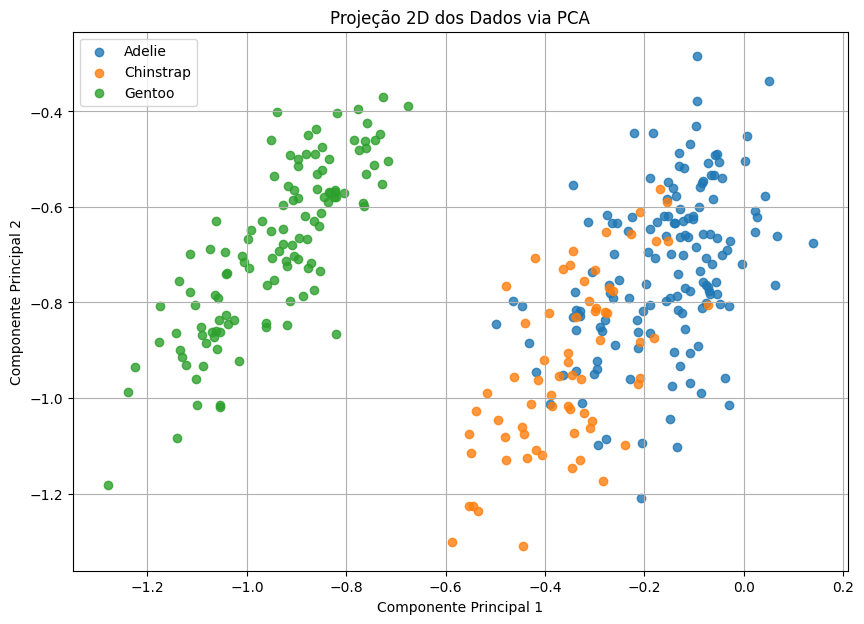

In [72]:
pca_2d = PCA(n_components=2)
pca_2d.fit(X)
X_projected_2d = pca_2d.transform(X)
species = ['Adelie', 'Chinstrap', 'Gentoo']

plt.figure(figsize=(10, 7))
for i, specie in enumerate(species):
    plt.scatter(X_projected_2d[y == i, 0], X_projected_2d[y == i, 1], alpha=0.8, label=specie)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Projeção 2D dos Dados via PCA')
plt.legend(loc='best')
plt.grid()
plt.show()


# Questão 2 -> item b

1. Variância explicada para a projeção em 2 dimensões
2. Variância explicada para a projeção em 1, 2, 3 e 4 dimensões.

In [73]:
variance_ratios = pca_2d.explained_variance_ratio_
for n in range(1, 3):
    print(f'Variância explicada (dimensão={n}): {sum(variance_ratios[:n]):.4f}')


Variância explicada (dimensão=1): 0.6963
Variância explicada (dimensão=2): 0.8879


In [74]:
for i in range(1, 5):
    pca = PCA(n_components=i)
    pca.fit(X)
    print("Número de dimensões:", i, "Variância:", sum(pca.explained_variance_ratio_[:i]))


Número de dimensões: 1 Variância: 0.6962662459329569
Número de dimensões: 2 Variância: 0.8879485511629697
Número de dimensões: 3 Variância: 0.9712542833257521
Número de dimensões: 4 Variância: 0.9999999999999999
